In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6
})

In [4]:
import os

path = "dataset/train/"
files = os.listdir(path)[:6]
print(files)

classes={'1':0, '2':1, '3':2, '4':3, '5':4, '6':5}

['1', '2', '3', '4', '5', '6']


In [5]:
import cv2

X=[]
Y=[]

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print("Dataset created succesfully!")  

Dataset created succesfully!


In [6]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


In [7]:
pd.Series(Y).value_counts()

0    192
1    192
2    192
3    192
4    192
5    192
dtype: int64

0


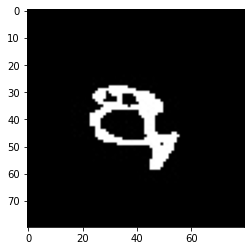

In [8]:
plt.imshow(X[10],cmap="gray")
print(Y[10])

In [9]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(1152, 6400)
(1152,)


In [10]:
imgs = np.expand_dims(X_new, -1)

In [11]:
labels, imgs = shuffle(Y, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [15]:
print(imgs_train.max())
print(imgs_test.max())
imgs_train = imgs_train/255
imgs_test = imgs_test/255
print(imgs_train.max())
print(imgs_test.max())
imgs_train.shape

255
255
1.0
1.0


(864, 6400, 1)

In [19]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(None, 80, 80, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

ValueError: Input 0 of layer "max_pooling2d_3" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, None, 76, 76, 256)

In [17]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [18]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20


ValueError: in user code:

    File "C:\Users\Moe\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Moe\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Moe\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Moe\Anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Moe\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Moe\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 80, 80, 1), found shape=(16, 6400, 1)
